<a href="https://colab.research.google.com/github/BANZOM/Stock_Market_Price_Prediction_by_LSTM/blob/main/stocks_market_prediction_usingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# downloading and importing libraries 

!pip install -q yfinance #Download market data from Yahoo! Finance's API
!pip install fix_yahoo_finance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# fundamental libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps

import datetime as dt
# from datetime import datetime


In [ ]:
# The tech stocks we'll use for this analysis 
# Apple, Google, Microsoft, Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Start and end time for the data to be extracted 
# end = datetime.now()
# start = datetime(end.year - 1, end.month, end.day)

start = datetime.today()-dt.timedelta(365)
end = datetime.today()

# start = '2010-01-01'
# end = '2016-12-31'


# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# DataFrame of the company 
# print("Apple: \n",AAPL)
# print("\nGoogle: \n",GOOG)
# print("\nMicrosoft: \n",MSFT)
# print("\nAmazon: \n",AMZN)

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-17,142.690002,143.380005,140.779999,142.100006,142.100006,48149800,AMAZON
2022-08-18,141.320007,142.770004,140.380005,142.300003,142.300003,37458700,AMAZON
2022-08-19,140.470001,141.110001,137.910004,138.229996,138.229996,47727300,AMAZON
2022-08-22,135.720001,136.320007,132.850006,133.220001,133.220001,50461500,AMAZON
2022-08-23,133.410004,134.990005,132.949997,133.619995,133.619995,36252100,AMAZON
2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000,AMAZON
2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300,AMAZON
2022-08-26,136.550003,137.830002,130.500000,130.750000,130.750000,53253100,AMAZON
2022-08-29,129.899994,131.949997,128.770004,129.789993,129.789993,48101600,AMAZON


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.057659,160.055119,156.229682,158.216469,157.725151,8.812783e+07
std,12.657038,12.660533,12.530808,12.585816,12.555133,2.642225e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.302494,149.437500,146.515003,148.382500,147.797485,6.947065e+07
50%,158.954994,161.495003,156.340004,159.065002,158.704758,8.237185e+07
75%,169.232502,171.057503,167.220001,168.970005,168.630116,1.002058e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [ ]:
# General info
# AAPL.info()

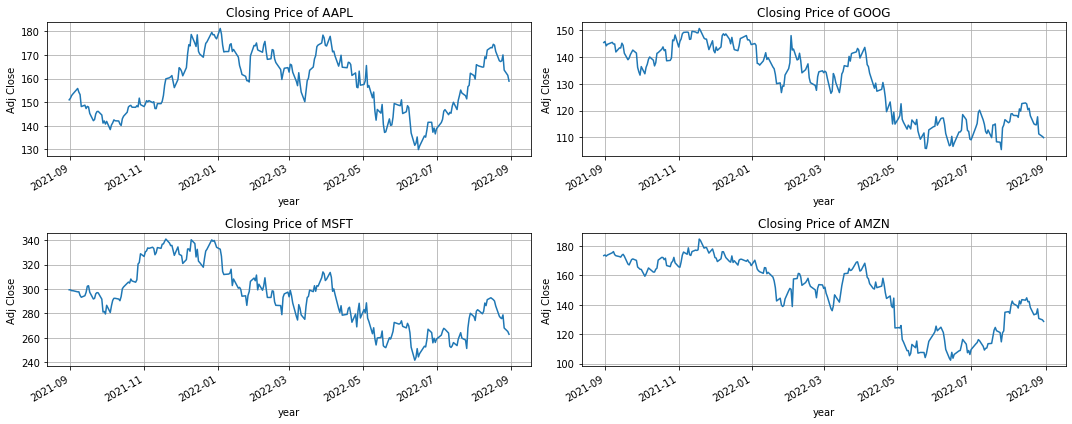

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=2, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.grid()
    plt.ylabel('Adj Close')
    plt.xlabel('year')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


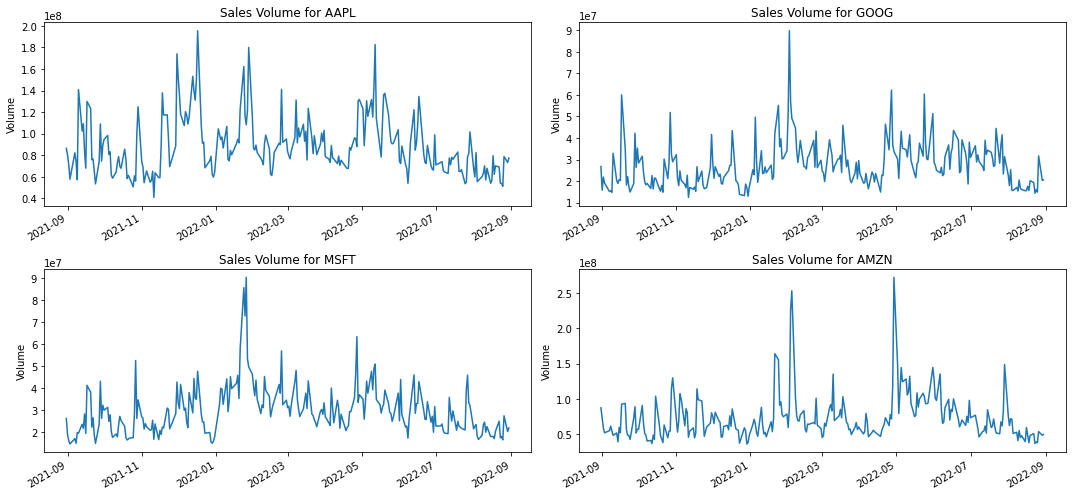

In [ ]:
# Now lets plot the total volume of stock being traded each day

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

# The below function is used to fit the above given functions in the given region
plt.tight_layout()

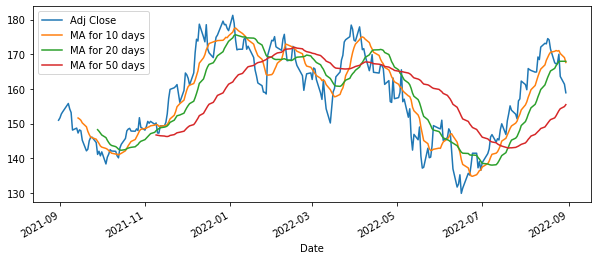

In [ ]:
# for plotting rolling averages

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = (f"MA for {ma} days")
        company[column_name] = company['Adj Close'].rolling(ma).mean()


AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

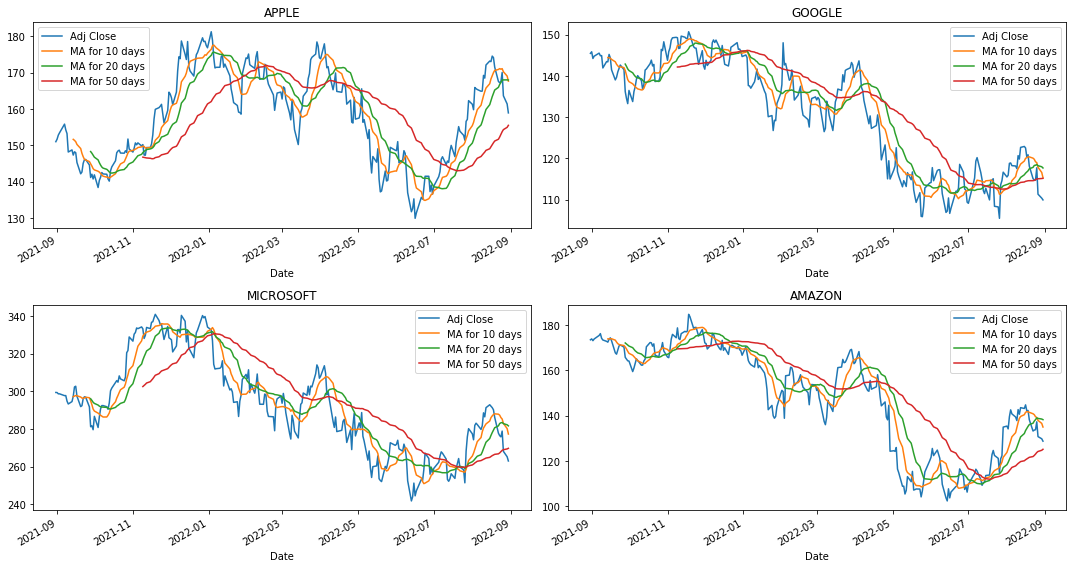

In [ ]:
#Let's assume it as a coordinate axes

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

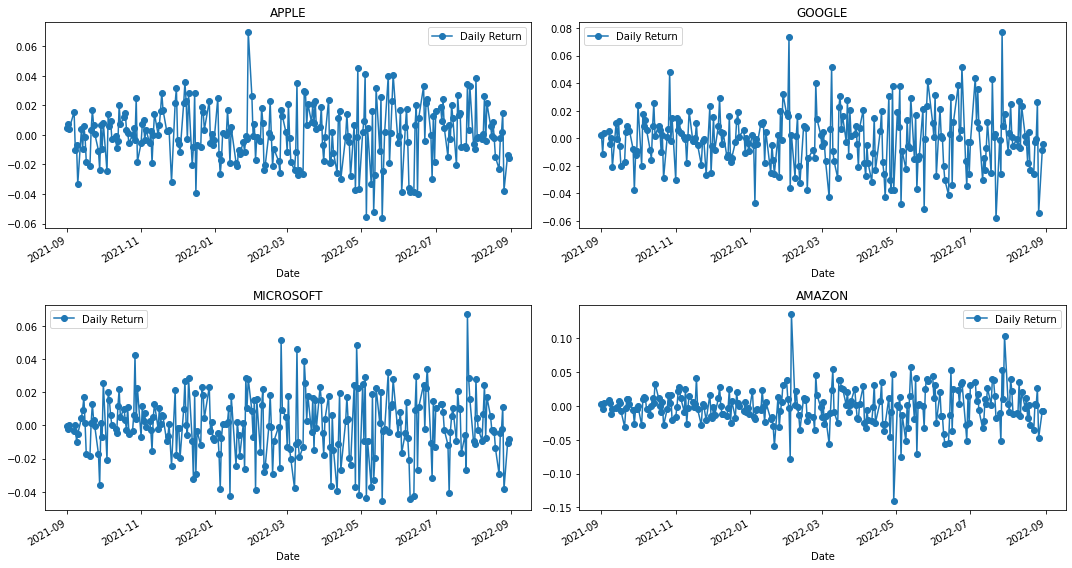

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

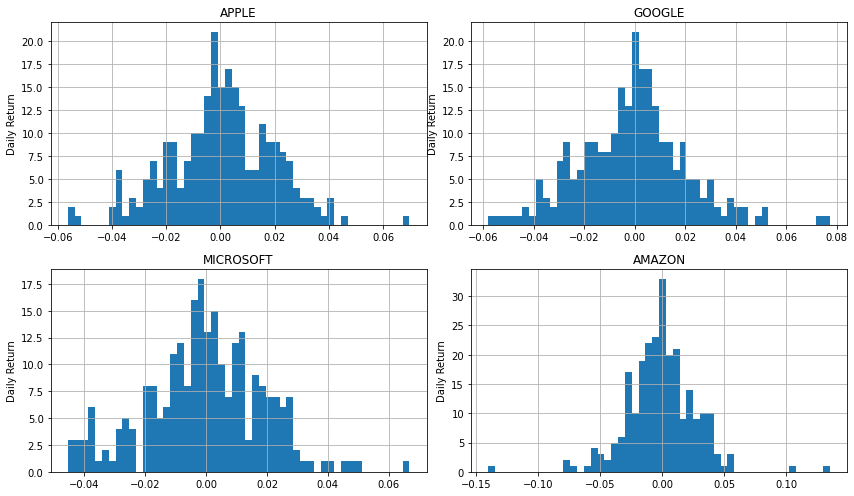

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

# closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# # Let's take a quick look
# closing_df.head() 

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

start = dt.datetime.today()-dt.timedelta(365)
end = dt.datetime.today()
#interval='1d'
closing_df = yf.download(tech_list, start=start, end=end,)['Adj Close']

# Let's take a quick look
closing_df.tail() 

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-24,167.529999,133.800003,114.699997,275.790009
2022-08-25,170.029999,137.279999,117.699997,278.850006
2022-08-26,163.619995,130.750000,111.300003,268.089996
2022-08-29,161.380005,129.789993,110.339996,265.230011
2022-08-30,158.910004,128.729996,109.910004,262.970001


In [ ]:
# Daily return
# Percentage change between the current and a prior element.: pct_change()

tech_return = closing_df.pct_change()
tech_return.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-24,0.001794,0.001347,-0.000610,-0.002351
2022-08-25,0.014923,0.026009,0.026155,0.011095
2022-08-26,-0.037699,-0.047567,-0.054375,-0.038587
2022-08-29,-0.013690,-0.007342,-0.008625,-0.010668
2022-08-30,-0.015305,-0.008167,-0.003897,-0.008521


In [ ]:
''' comparing the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself. '''

" comparing the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself. "

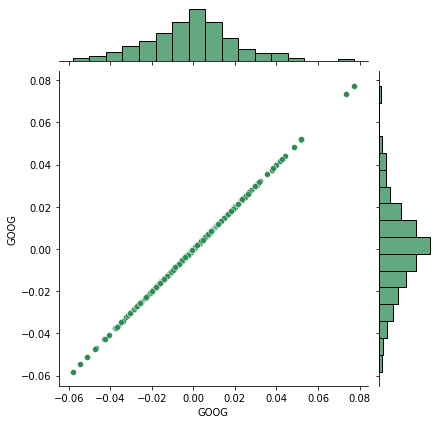

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot(x='GOOG', y='GOOG', data=tech_return, kind='scatter', color='seagreen') 

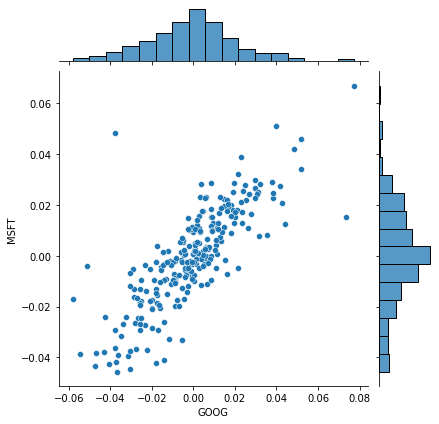

In [ ]:
# Comparing Google with Microsoft 
# we will use joinplot to compare the daily returns
 
sns.jointplot(x='GOOG', y='MSFT', data=tech_return, kind='scatter')

In [ ]:
''' we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.
    
'''

' we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.\n    \n'

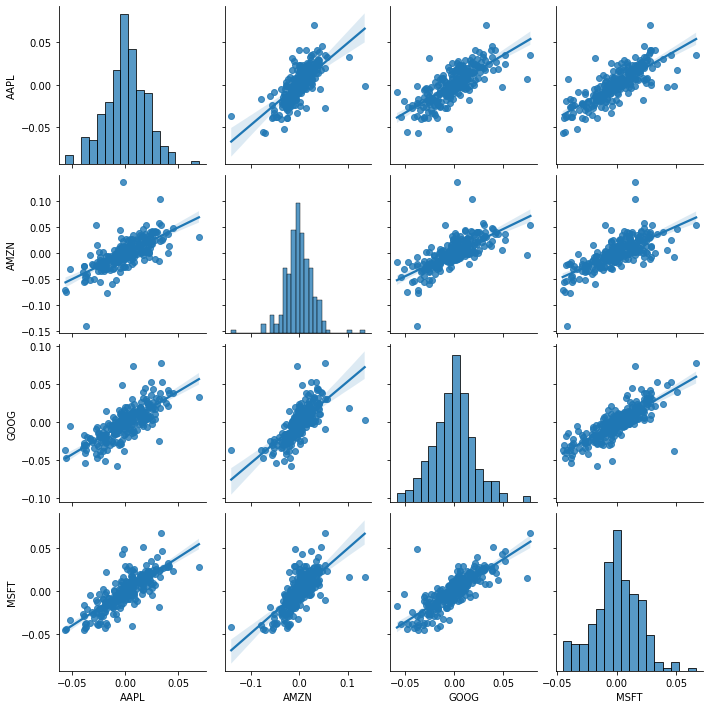

In [ ]:
#repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot
# kind = 'reg', IS FOR THE LINE DIFFERENTIATING THE DATA
# kernel density estimate (KDE)
# reg: to get that line

sns.pairplot(tech_return, kind='reg')

In [ ]:
'''we can also use sns.PairGrid() for full control of the figure,
   including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 
   Below is an example of utilizing the full power of seaborn to achieve this result.'''

'we can also use sns.PairGrid() for full control of the figure,\n   including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. \n   Below is an example of utilizing the full power of seaborn to achieve this result.'

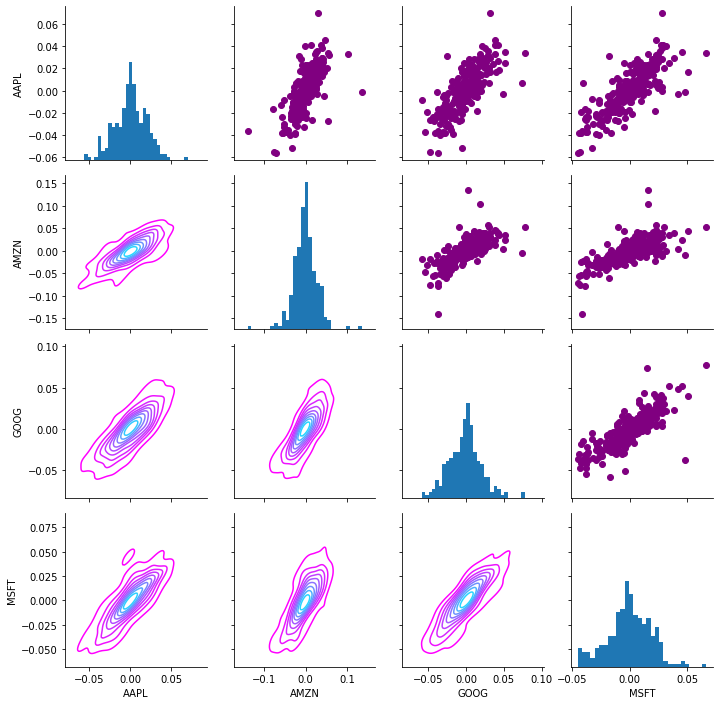

In [ ]:


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_return.dropna())

# The dropna() method removes all the rows that contains NULL values.

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [ ]:
''' NOW LETS LOOK UP INPO THE PAIR PLOTS BTWN CLOSING DFs OF COMPNAIES'''

' NOW LETS LOOK UP INPO THE PAIR PLOTS BTWN CLOSING DFs OF COMPNAIES'

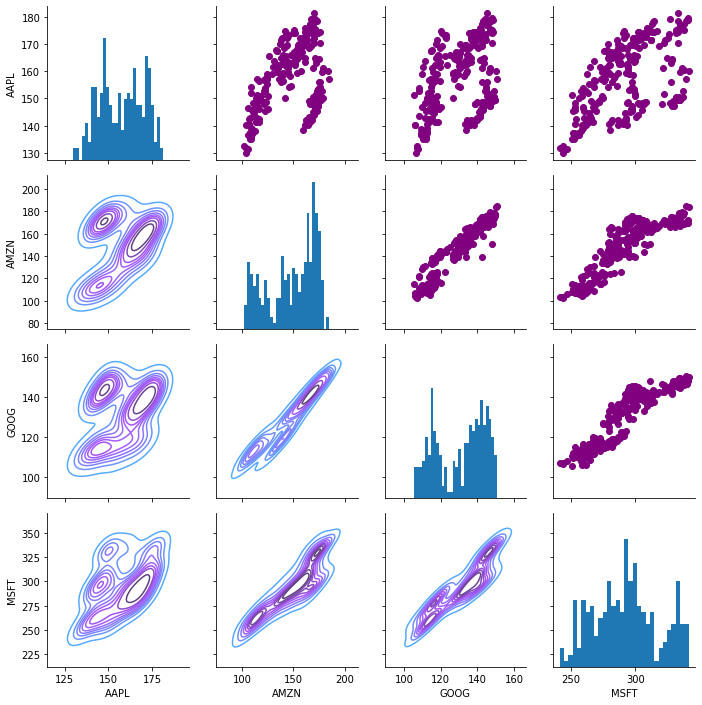

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')# Cmap = Color map

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)# Bins----> Are Towers or Bars

In [ ]:
'''

We completed the pair plot,
Now we use seabron for a quick correlation plot for the daily returns; By comparing the closing prices, we can see the relationship between the companies.

'''

'\n\nWe completed the pair plot,\nNow we use seabron for a quick correlation plot for the daily returns; By comparing the closing prices, we can see the relationship between the companies.\n\n'

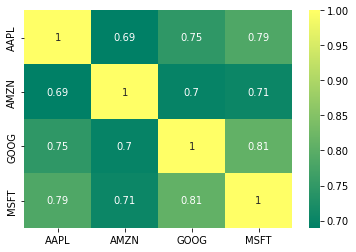

In [ ]:
# corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.
# here we use heatmap bcz it provides an excellent visual tool for comparing various entities.
# cmap – a matplotlib colormap name or object. This maps the data values to the color space.

# tech return
sns.heatmap(tech_return.corr(), annot=True, cmap='summer')

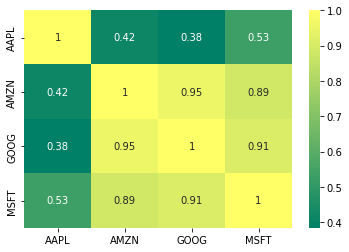

In [ ]:
# closing price
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [ ]:
""" above we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return."""

' above we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return.'

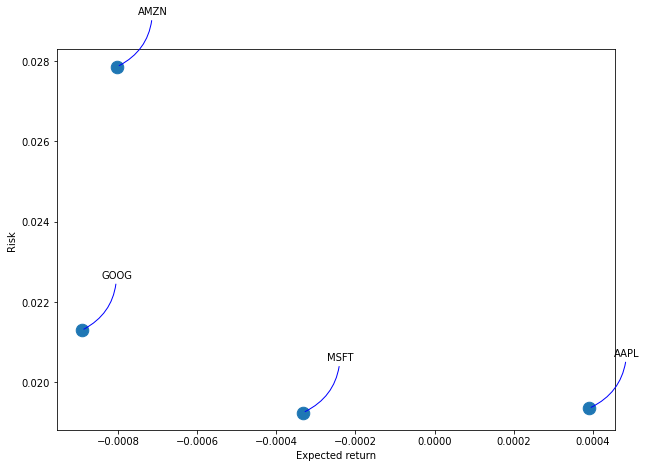

In [ ]:
# Let's start by defining a new DataFrame as a cleaned version of the original tech_returns DataFrame
rets = tech_return.dropna()

area = np.pi * 50

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = yf.download('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.540045,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.607440,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.747405,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.880664,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.860232,394024400
...,...,...,...,...,...,...
2022-08-24,167.320007,168.110001,166.250000,167.529999,167.529999,53841500
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500


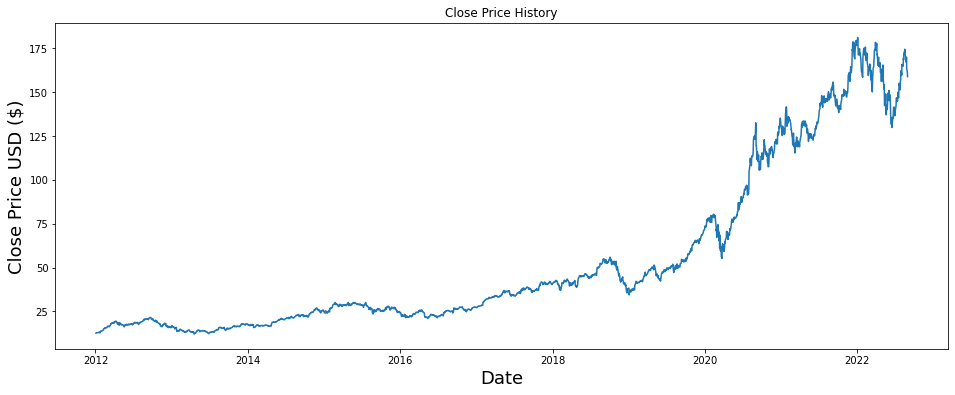

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2549

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.89057642],
       [0.87724811],
       [0.86255118]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2489/2489 [==============================] - 72s 28ms/step - loss: 0.0011


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.8119866515055465

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


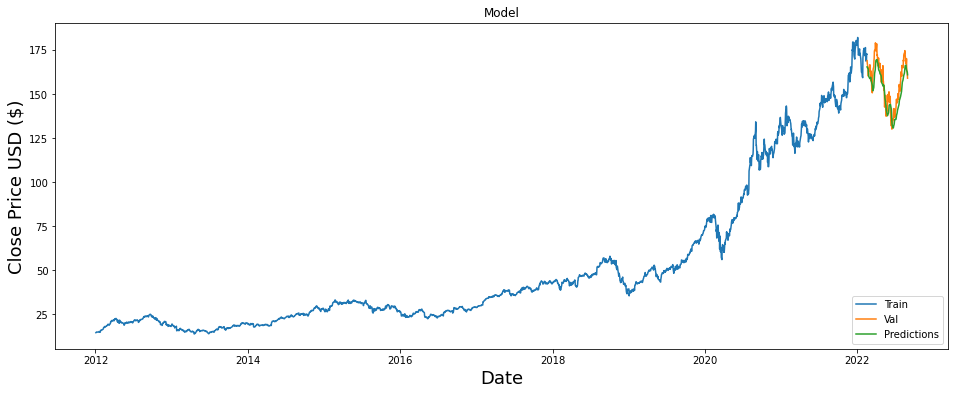

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2022-02-17,168.880005,165.349182
2022-02-18,167.300003,164.934998
2022-02-22,164.320007,164.219482
2022-02-23,160.070007,163.062103
2022-02-24,162.740005,161.292145
...,...,...
2022-08-24,167.529999,164.716965
2022-08-25,170.029999,163.768753
2022-08-26,163.619995,163.335449


In [ ]:
''' TEMP0RARY BY ADITYA '''
# from pandas_datareader import data


# closing_df = data.DataReader(tech_list,'google', start, end)['Adj Close']
# closing_df.head()


' TEMP0RARY BY ADITYA '

In [ ]:
''' TEMP0RARY BY ADITYA '''

# import pandas_datareader.data as pdr

# for stocks in tech_list:
#     try:
#         closing_df = pdr.DataReader(stocks,'google', start, end)['Adj Close']
#         print(closing_df.head())
#     except:
#         print("Did not find: "+stocks)



' TEMP0RARY BY ADITYA '